In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

In [2]:
data = pd.read_csv(r"C:\Users\PRANAV\Desktop\Refactored_Py_DS_ML_Bootcamp-master\20-Natural-Language-Processing\smsspamcollection\SMSSpamCollection", sep='\t', names=['label','message'])
data.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
data['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [4]:
data.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [6]:
data.shape

(5572, 2)

In [7]:
data['length'] = data['message'].apply(len) 

In [8]:
data

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160
5568,ham,Will ü b going to esplanade fr home?,36
5569,ham,"Pity, * was in mood for that. So...any other s...",57
5570,ham,The guy did some bitching but I acted like i'd...,125


<BarContainer object of 5572 artists>

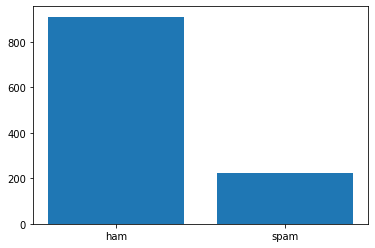

In [9]:
plt.bar(data['label'],data['length'])

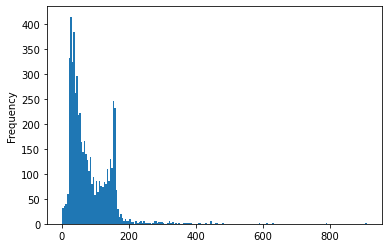

In [10]:
data['length'].plot(bins=200, kind='hist')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000016137B696C8>,
      dtype=object)

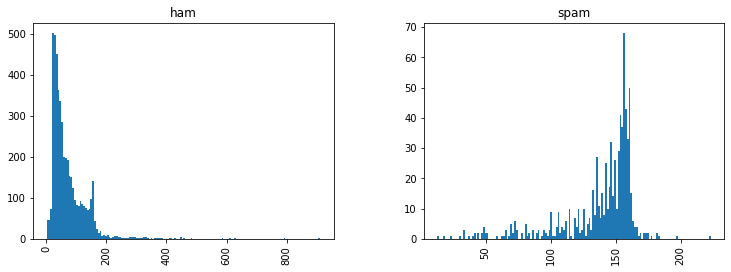

In [11]:
data.hist(column='length', by='label',bins=150,figsize=(12,4))

In [12]:

import string
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PRANAV\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [13]:
def text_process(mess):
    
    nopunc = [char for char in mess if char not in string.punctuation]
    
    nopunc = ''.join(nopunc)
    
    return nopunc

In [14]:
data['message'] = [x.lower() for x in data['message']]
data

,label,message,length
0,ham,"go until jurong point, crazy.. available only ...",111
1,ham,ok lar... joking wif u oni...,29
2,spam,free entry in 2 a wkly comp to win fa cup fina...,155
3,ham,u dun say so early hor... u c already then say...,49
4,ham,"nah i don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,spam,this is the 2nd time we have tried 2 contact u...,160
5568,ham,will ü b going to esplanade fr home?,36
5569,ham,"pity, * was in mood for that. so...any other s...",57
5570,ham,the guy did some bitching but i acted like i'd...,125


In [15]:
data['message'] = data['message'].apply(text_process)

In [16]:
X = data['message']
y = data['label']

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
model_1 = RandomForestClassifier()

text_clv = Pipeline([('Tfidf',TfidfVectorizer()),('model_1',RandomForestClassifier(n_estimators=100,max_features=10))])


In [19]:
text_clv.fit(X_train,y_train)

Pipeline(steps=[('Tfidf', TfidfVectorizer()),
                ('model_1', RandomForestClassifier(max_features=10))])

In [20]:
pred = text_clv.predict(X_test)

In [21]:
print('Accuracy: ',np.mean(y_test==pred)*100)

Accuracy:  96.4110929853181


In [22]:
predict = text_clv.predict(["['doctor', 'mbbs', 'student', 'found', 'shot', 'dead', 'hostel']"])

In [23]:
predict

array(['ham'], dtype=object)

In [24]:
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\PRANAV\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [25]:
#Sentimental Analysis
def get_sentiment(text):
    sia = SentimentIntensityAnalyzer()
    analysis = sia.polarity_scores(text)
    
    if analysis['compound']>0:
        print('SentimentalScore:',analysis['compound'],'This is Positive Sentence')
    elif analysis['compound']<0:
        print('SentimentalScore:',analysis['compound'],'This is Negative Sentence')
    else:
        print('SentimentalScore:',analysis['compound'],'This is Nutral Sentence')

In [26]:
get_sentiment('As per your request  has been set as your callertune for all Callers.' )

SentimentalScore: 0.0 This is Nutral Sentence
